# Draw Radar Chart

Sample code from matplotlib (https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html)

Import Python packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

Define `radar_factory` function

In [2]:
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

Define data

In [8]:
def example_data():
    data = [
        ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'],
        ('DEC TEMP', [
            [0.23, 0.45, 0.38, np.nan, np.nan, np.nan, np.nan],
            [0.15, 0.29, 0.25, np.nan, np.nan, np.nan, np.nan]]),
        ('JAN TEMP', [
            [0.22, 0.05, 0.27, np.nan, np.nan, np.nan, np.nan],
            [0.07, 0.07, 0.19, np.nan, np.nan, np.nan, np.nan]]),
        ('FEB TEMP', [
            [0.02, 0.03, 0.19, np.nan, np.nan, np.nan, np.nan],
            [0.07, 0.08, 0.22, np.nan, np.nan, np.nan, np.nan]]),
        ('JUN TEMP', [
            [0.61, 0.23, 0.53, np.nan, np.nan, np.nan, np.nan],
            [0.5, 0.24, 0.57, np.nan, np.nan, np.nan, np.nan]]),
        ('JUL TEMP', [
            [0.63, 0.48, 0.53, np.nan, np.nan, np.nan, np.nan],
            [0.59, 0.44, 0.45, np.nan, np.nan, np.nan, np.nan]]),
        ('AUG TEMP', [
            [0.15, 0.14, 0.58, np.nan, np.nan, np.nan, np.nan],
            [0.14, 0.07, 0.57, np.nan, np.nan, np.nan, np.nan]]),
        ('AUG PREC', [
            [0.54, 0.44, 0.37, np.nan, np.nan, np.nan, np.nan],
            [0.53, 0.15, 0.23, np.nan, np.nan, np.nan, np.nan]]),
        ('JA TEMP', [
            [0.28, 0.6, 0.53, np.nan, np.nan, np.nan, np.nan],
            [0.24, 0.38, 0.3, np.nan, np.nan, np.nan, np.nan]]),
        ('JANG-MA', [
            [0.67, 0.4, 0.44, 0.43, 0.38, 0.29, 0.43],
            [0.62, 0.26, 0.45, 0.36, 0.04, 0.2, 0.49]]),
    ]
    return data

Draw radar chart

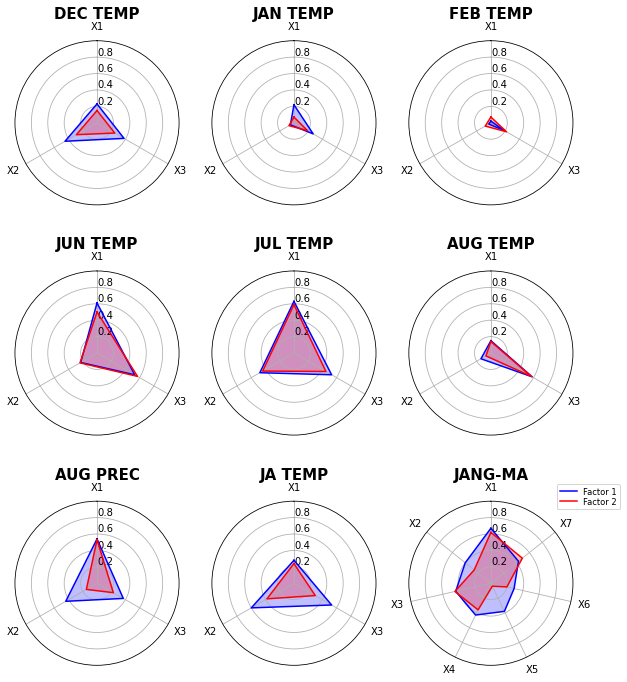

In [12]:
if __name__ == '__main__':
    
    data = example_data()
    spoke_labels = data.pop(0)

    fig = plt.figure(figsize=(10,12))
    
    nrow, ncol = [3, 3]
    gs = fig.add_gridspec(nrow, ncol)
    
    colors = ['b', 'r']
    for i, (title, case_data) in enumerate(data):
        l = [x for x in case_data[0] if np.isnan(x) == False]
        N = len(l)
        row, col = i//ncol, i%nrow
        theta = radar_factory(N, frame='circle')
        ax = fig.add_subplot(gs[row,col], projection='radar')
        
        ax.set_rgrids([0.2, 0.4, 0.6, 0.8], angle=0)
        ax.set_title(title, weight='bold', fontsize=15, position=(0.5, 1.5),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            l = [x for x in d if np.isnan(x) == False]
            ax.plot(theta, l, color=color)
            ax.fill(theta, l, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels[:len(l)])
        ax.set_ylim([0,1])

    # add legend relative to top-left plot
    labels = ('Factor 1', 'Factor 2')
    legend = ax.legend(labels, loc=(0.9, .95), labelspacing=0.1, fontsize='small')

    plt.show()
    fig.savefig('radar_chart.png', dpi=500, bbox_inches='tight')